In [3]:
from sklearn.cluster import KMeans

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")

In [4]:
X = pd.read_csv('Mall_Customers.csv')

In [5]:
X.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
X = X.filter(["Annual Income (k$)",
              "Spending Score (1-100)"], axis = 1)

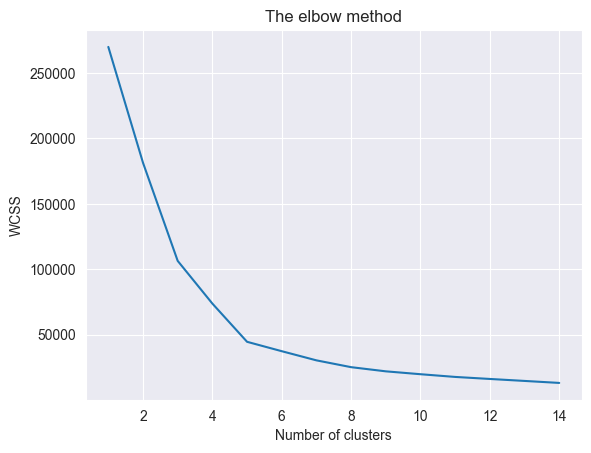

In [7]:
wcss = []

for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

#melakukan plot untuk hasil sehingga bisa
#melakukan observasi terhadap elbow
plt.plot(range(1, 15), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #WCSS = within cluster sum of squares
plt.show()

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

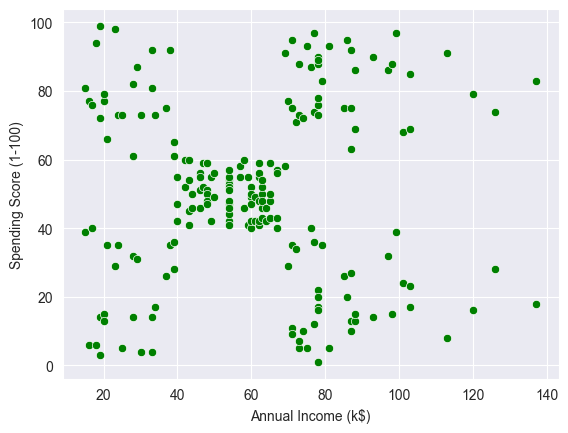

In [8]:
sns.scatterplot(data = X, x="Annual Income (k$)",y="Spending Score (1-100)",
                c=["green"])

In [9]:
model = KMeans(n_clusters= 5)
model.fit(X)

KMeans(n_clusters=5)

In [10]:
print(model.cluster_centers_)

[[87.75       17.58333333]
 [25.72727273 79.36363636]
 [55.0875     49.7125    ]
 [26.30434783 20.91304348]
 [86.53846154 82.12820513]]


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

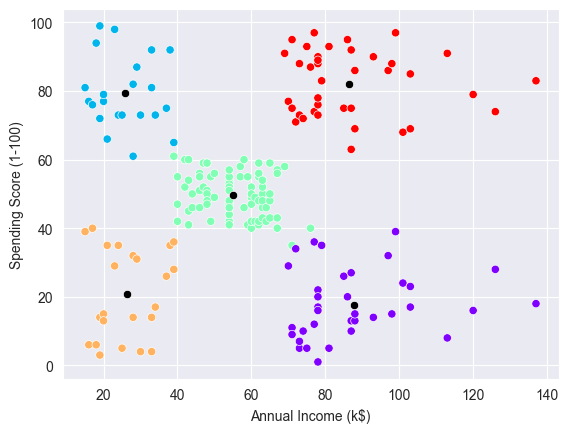

In [11]:
sns.scatterplot(data = X, x="Annual Income (k$)", y="Spending Score (1-100)",
                c= model.labels_, cmap='rainbow')

sns.scatterplot(x=model.cluster_centers_[:, 0],
                y=model.cluster_centers_[:, 1],
                c=['black'])

In [102]:
#tugas 2a
A = pd.read_csv('spotify_data.csv')

In [103]:
A.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [104]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2017 non-null   int64  
 1   acousticness      2017 non-null   float64
 2   danceability      2017 non-null   float64
 3   duration_ms       2017 non-null   int64  
 4   energy            2017 non-null   float64
 5   instrumentalness  2017 non-null   float64
 6   key               2017 non-null   int64  
 7   liveness          2017 non-null   float64
 8   loudness          2017 non-null   float64
 9   mode              2017 non-null   int64  
 10  speechiness       2017 non-null   float64
 11  tempo             2017 non-null   float64
 12  time_signature    2017 non-null   float64
 13  valence           2017 non-null   float64
 14  target            2017 non-null   int64  
 15  song_title        2017 non-null   object 
 16  artist            2017 non-null   object 


In [105]:
A.drop(columns="Unnamed: 0",inplace=True)
A.drop(columns="artist",inplace=True)
A.drop(columns="song_title",inplace=True)
A.isnull().sum()

acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
target              0
dtype: int64

In [106]:
xi = A.filter(["danceability", "energy"], axis = 1)

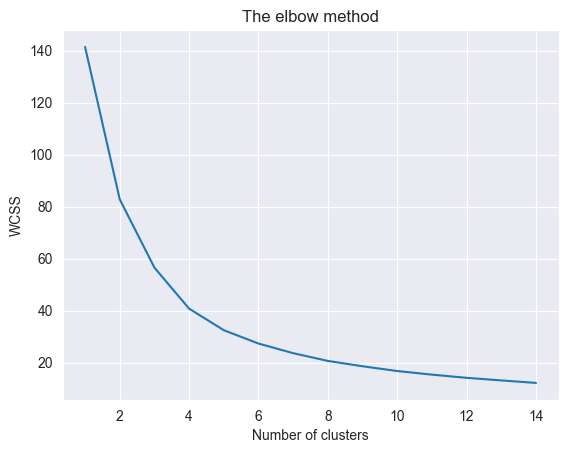

In [107]:
wcss = []

for i in range (1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(xi)
    wcss.append(kmeans.inertia_)

#Melakukan plot untuk hasil sehingga bisa melakukan observasi terhadap elbow
plt.plot(range(1,15), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #WCSS = within cluster sum of squares
plt.show()

<Axes: xlabel='danceability', ylabel='energy'>

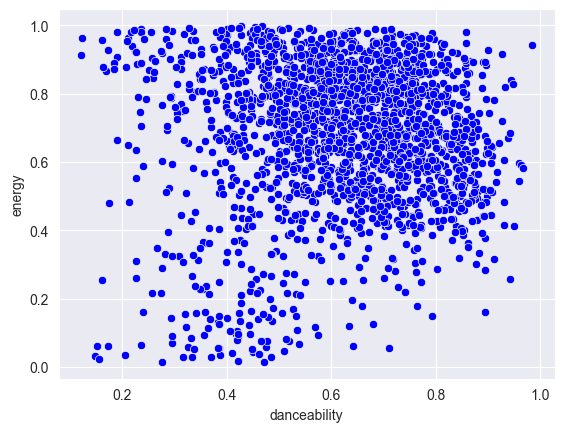

In [108]:
sns.scatterplot(data = xi, x="danceability", y="energy", c = ["blue"])

In [109]:
model = KMeans(n_clusters=5)
model.fit(xi)

KMeans(n_clusters=5)

In [110]:
print(model.cluster_centers_)

[[0.77349571 0.54385837]
 [0.43149118 0.87455   ]
 [0.43562353 0.22197706]
 [0.70231094 0.83311563]
 [0.54031421 0.63098753]]


<Axes: xlabel='danceability', ylabel='energy'>

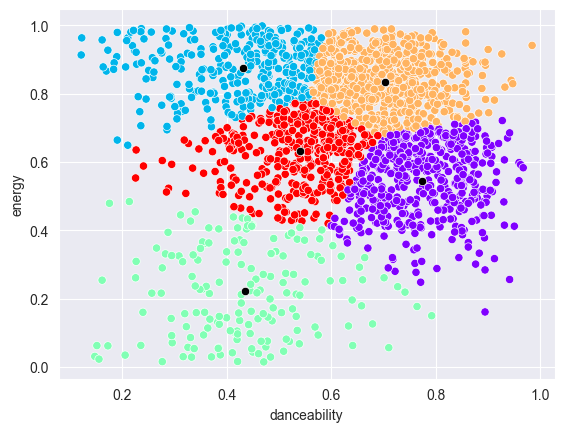

In [111]:
sns.scatterplot (data = xi, x="danceability", y="energy",  c=model.labels_, cmap = 'rainbow')
sns.scatterplot(x=model.cluster_centers_[:, 0], y=model.cluster_centers_[:, 1], c=['black'])

In [112]:
xii = A.filter(["acousticness", "danceability", "energy", "duration_ms", "instrumentalness",
                "key", "liveness", "loudness", "mode", "speechiness", "tempo","time_signature",
                "valence", "target"], axis = 1)

In [113]:
xii.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      2017 non-null   float64
 1   danceability      2017 non-null   float64
 2   energy            2017 non-null   float64
 3   duration_ms       2017 non-null   int64  
 4   instrumentalness  2017 non-null   float64
 5   key               2017 non-null   int64  
 6   liveness          2017 non-null   float64
 7   loudness          2017 non-null   float64
 8   mode              2017 non-null   int64  
 9   speechiness       2017 non-null   float64
 10  tempo             2017 non-null   float64
 11  time_signature    2017 non-null   float64
 12  valence           2017 non-null   float64
 13  target            2017 non-null   int64  
dtypes: float64(10), int64(4)
memory usage: 220.7 KB


In [114]:
model = KMeans(n_clusters=5)
model.fit(xii)

KMeans(n_clusters=5)

In [115]:
print(model.cluster_centers_)

[[ 1.68501873e-01  6.15379350e-01  6.89916473e-01  2.34970255e+05
   8.49298959e-02  5.34918794e+00  1.89133643e-01 -6.64398608e+00
   6.25290023e-01  8.99537123e-02  1.21843194e+02  3.97795824e+00
   4.86303364e-01  4.54756381e-01]
 [ 2.53300797e-01  6.57943548e-01  5.90810484e-01  4.17840073e+05
   4.26390304e-01  5.67741935e+00  1.64004032e-01 -1.04763065e+01
   5.32258065e-01  6.74709677e-02  1.17457419e+02  3.96774194e+00
   4.58454032e-01  7.58064516e-01]
 [ 1.96398028e-01  6.20175194e-01  7.05781705e-01  1.80349462e+05
   8.92426804e-02  5.11317829e+00  1.90197674e-01 -6.45820310e+00
   6.43410853e-01  1.01347132e-01  1.23130724e+02  3.97054264e+00
   5.45309767e-01  4.52713178e-01]
 [ 1.83011743e-01  6.14252778e-01  6.55661111e-01  3.02907000e+05
   2.08438187e-01  5.67500000e+00  1.98371944e-01 -7.82518333e+00
   5.63888889e-01  9.44252778e-02  1.20705544e+02  3.94444444e+00
   4.51904722e-01  6.19444444e-01]
 [ 3.51931923e-01  5.45038462e-01  5.96361538e-01  6.56582615e+05
  

In [98]:
model = KMeans(n_clusters=6)
model.fit(xii)

KMeans(n_clusters=6)

<class 'mpl_toolkits.mplot3d.axes3d.Axes3D'>


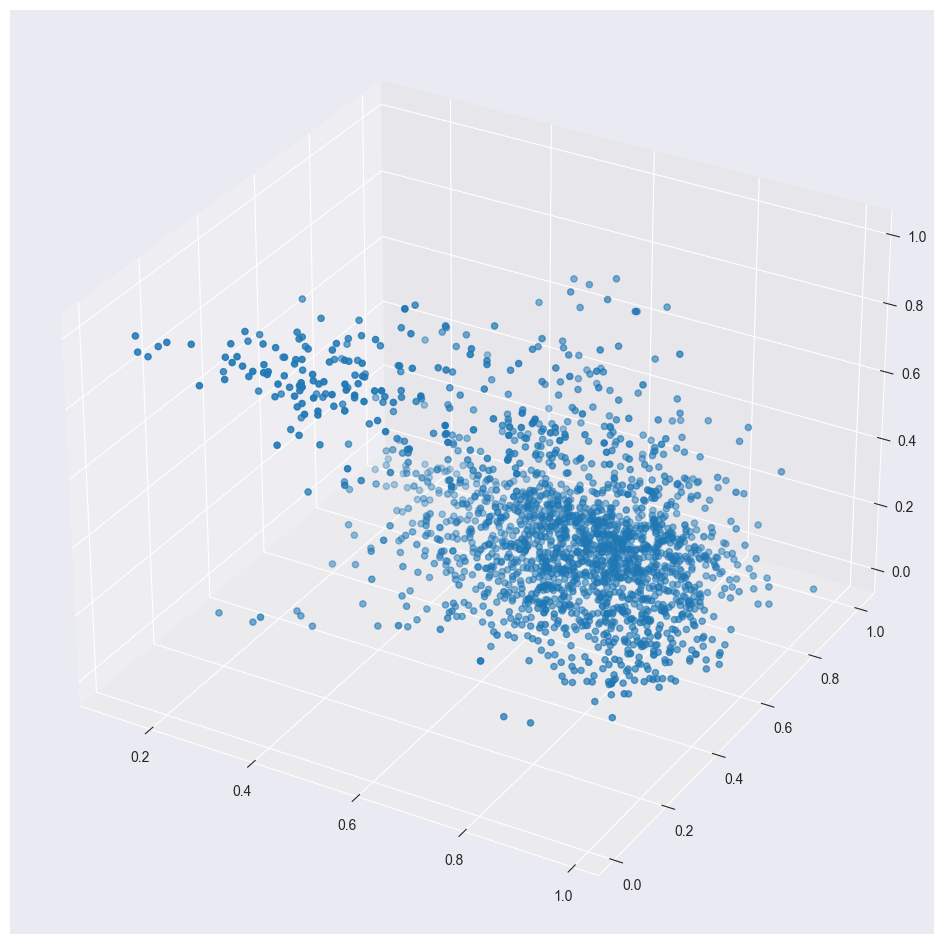

In [116]:
plt.figure (figsize=(15,12))
plot = plt.axes(projection = '3d')

seaborn_plot = plt.axes (projection='3d')
print (type (seaborn_plot))
seaborn_plot.scatter3D (A["danceability"], A["energy"], A["acousticness"])
plt.show()